In [197]:
from sklearn.datasets import load_iris

In [198]:
iris = load_iris()

In [199]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [200]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [201]:
import pandas as pd

In [202]:
X = pd.DataFrame(data=iris.data, columns = iris.feature_names)

In [203]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [204]:
y = pd.DataFrame(iris.target, columns=["irisType"])

In [205]:
y.head()

,irisType
0,0
1,0
2,0
3,0
4,0


In [206]:
y.irisType.value_counts()

0    50
1    50
2    50
Name: irisType, dtype: int64

In [207]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [208]:
import seaborn as sns

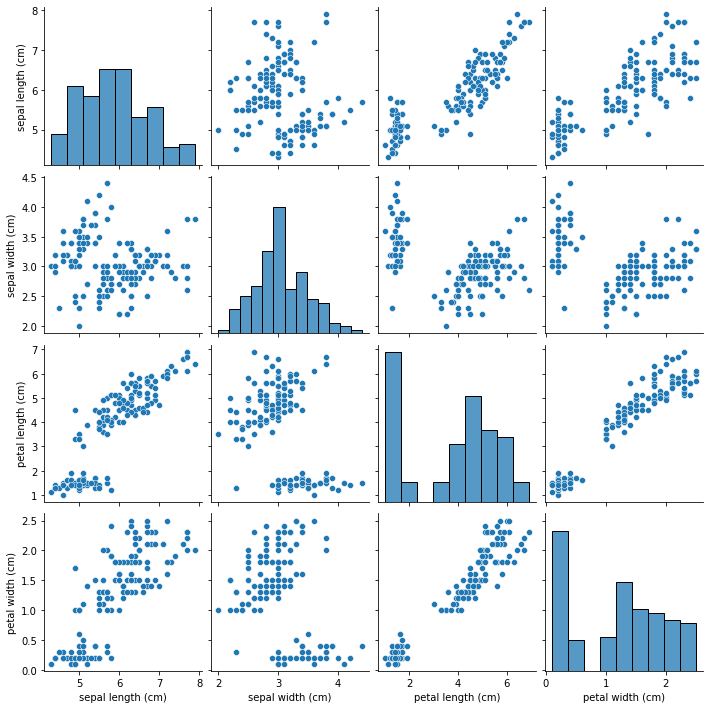

In [209]:
sns.pairplot(X)

In [210]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [211]:
from sklearn.model_selection import train_test_split

In [212]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42 )

In [213]:
X_train.shape

(135, 4)

In [214]:
X_test.shape

(15, 4)

In [215]:
y_train.shape

(135, 1)

In [216]:
y_test.shape

(15, 1)

In [217]:
X_train.var(), x_test.var()

(sepal length (cm)    0.694776
 sepal width (cm)     0.191114
 petal length (cm)    3.107892
 petal width (cm)     0.578925
 dtype: float64,
 sepal length (cm)    0.638095
 sepal width (cm)     0.192667
 petal length (cm)    3.318095
 petal width (cm)     0.623524
 dtype: float64)

In [218]:
import tensorflow as tf

In [219]:
y_train = tf.keras.utils.to_categorical(y_train)

In [220]:
y_test = tf.keras.utils.to_categorical(y_test)

In [221]:
y_train[:5,:]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [222]:
X_train = X_train.values
X_test  = X_test.values

In [223]:
X_train[0]

array([6.3, 3.3, 4.7, 1.6])

In [224]:
from tensorflow.keras.models import Sequential

In [225]:
from tensorflow.keras.layers import Dense

In [226]:
model = Sequential()
model.add(Dense(64,activation  = "relu", input_shape=X_train[0].shape))
model.add(Dense(128,activation = "relu"))
model.add(Dense(128,activation = "relu"))
model.add(Dense(128,activation = "relu"))
model.add(Dense(128,activation = "relu"))
model.add(Dense(64,activation  = "relu"))
model.add(Dense(64,activation  = "relu"))
model.add(Dense(64,activation  = "relu"))
model.add(Dense(64,activation  = "relu"))
model.add(Dense(3, activation  = "softmax"))

In [227]:
model.compile(optimizer="adam", loss = "categorical_crossentropy",
             metrics= ["acc"] )

In [228]:
history = model.fit(X_train, y_train, 
                    batch_size=32,
                    epochs=7,
                    validation_split=0.1)

Epoch 1/7
4/4 [==============================] - 1s 45ms/step - loss: 1.0811 - acc: 0.3306 - val_loss: 0.9755 - val_acc: 0.5000
Epoch 2/7
4/4 [==============================] - 0s 8ms/step - loss: 0.9968 - acc: 0.3306 - val_loss: 0.8668 - val_acc: 0.5000
Epoch 3/7
4/4 [==============================] - 0s 8ms/step - loss: 0.9042 - acc: 0.3636 - val_loss: 0.7576 - val_acc: 0.6429
Epoch 4/7
4/4 [==============================] - 0s 8ms/step - loss: 0.8261 - acc: 0.6777 - val_loss: 0.6833 - val_acc: 0.6429
Epoch 5/7
4/4 [==============================] - 0s 8ms/step - loss: 0.7636 - acc: 0.7273 - val_loss: 0.6423 - val_acc: 0.9286
Epoch 6/7
4/4 [==============================] - 0s 8ms/step - loss: 0.6708 - acc: 0.7686 - val_loss: 0.5245 - val_acc: 0.9286
Epoch 7/7
4/4 [==============================] - 0s 8ms/step - loss: 0.5100 - acc: 0.9339 - val_loss: 0.3400 - val_acc: 0.9286


In [229]:
import matplotlib.pyplot as plt

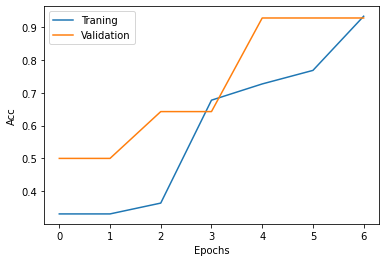

In [230]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend(["Traning", "Validation"]);

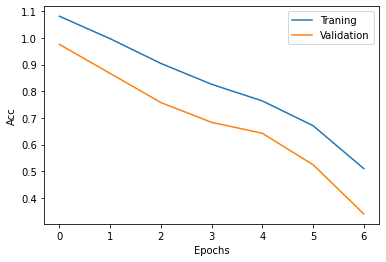

In [231]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend(["Traning", "Validation"]);

In [232]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 16ms/step - loss: 0.4027 - acc: 0.9333


[0.4027371108531952, 0.9333333373069763]